# Support Vector Machine 정리

본 포스팅 시리즈는 다양한 머신러닝 테크닉에 대해 수학적 관점과 실용적 관점에서 정리한다.

필자는 수학을 전공했기 때문에 수학적 접근과 용어에 대해 익숙하게 사용한 것이 있지만, 수학을 전공하지 않은 사람들에겐 다소 낯선 접근과 용어가 있을 수 있다.

최대한 그러한 부분을 자세히 설명하려 노력하였지만 필자의 타전공자에 대한 '공감능력부족'으로 효과적으로 전달되지 못한 부분이 있을 것으로 생각된다.

이 글을 읽어주시는 분께 일차적으로 감사드리며, 해당 부분에 대해 질문이나 코멘트를 남겨주시는 분께는 거듭제곱으로 감사드림을 말씀드린다.

# Support Vector Machine

서포트 벡터 머신은 딥러닝이 등장하기 이전에 가장 유명하고 성능 좋은 머신러닝 모델이었다고 한다. 
현재는 다소 실무에서 사용되는 정도가 줄어들었겠지만, 서포트 벡터 머신에 적용되는 다양한 수학적 테크닉들은 인공지능을 이해하고 연구하는 데에 여전히 훌륭한 인사이트를 준다고 생각한다.
특히 서포트 벡터 머신의 아이디어는 유클리드 기하학과 최적화 이론으로 설명이 된다는 점은 수학자들에게 있어서 굉장히 매력적이다.

본 포스팅의 내용은 다음의 자료들을 참고했다.

> 1. Mathematics for Machine Learning (Deisenroth, Marc Peter and Faisal, A. Aldo and Ong, Cheng Soon)
> 2. The Elements for Statistical Learning (Trevor Hastie, Robert Tibshirani, Jerome Friedman)
> 3. 김민준님(이화여자대학교, 수학과 석사)의 SVM Lecture note
> 4. 김원화 교수님(포항공과대학교, 인공지능대학원 교수)의 데이터 마이닝 Lecture note
> 5. Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow (Aurelien, Geron)


## 1. Introduction
**Support Vector Machine**(SVM)은 데이터를 분류하기 위해 클래스 사이의 마진(margin)을 최대화하는 초평면을 찾는다. 

예를들어, 두 개의 특성변수를 가지는 이진분류 문제는 데이터를 2차원 평면상에 표현할 수 있으며, SVM은 이들 두 클래스를 분할하면서 마진(직선 양 옆으로 평행하게 뻗은 띠)을 최대화하는 직선을 찾는다.

> **용어정리**
> 
> - *서포트 벡터 (Support Vector)* : 새로운 데이터가 들어왔을 때, 해당 데이터를 구분시켜줄 기준이 되는 샘플
> - *결정 경계 (Decision Boundary)* : 모델에 의해 만들어진 클래스를 구분할 기준이 되는 초평면
> - *마진 (Margin)* : 결정 경계를 중심으로 서포트 벡터까지의 거리만큼 나란하게 떨어진 영역

![svm_figure.png](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/margin.png?raw=true)

SVM은 확률모델에 기반으로한 머신러닝 모델들과는 다른 두 가지 특징을 가진다.

> 1. SVM은 지도학습 문제를 기하학적인 방법으로 접근한다. 이는 확률모델의 관점으로 접근하는 많은 머신러닝 모델들과 구별되는 점이다.
> 2. (soft-margin) SVM의 최적화 문제는 해석적 해를 구하기 어렵다. 따라서 다양한 최적화 방법론(e.g. 경사하강법)에 의존해야 한다.

확률모델에 기반한 머신러닝 모델은 *최대우도추정*(Maximum Likelihood Estimation)과 *베이지안 추정*(Bayesian inference)를 취하고 있다.
이러한 관점에서 확률기반 모델은 데이터의 유사성에 대한 확률론적 시각(e.g. 확률분포)을 기반으로한 최대우도를 추정하는 최적화문제로 모델추론에 접근한다.

그러나 SVM은 데이터의 유사성에 대한 기하학적 시각을 기반으로 최적화문제를 제시한다.
데이터의 유사성에 대한 기하학적 시각은 *내적*(inner product)과 *거리*(metric) 개념에 의존한다.
SVM은 두 클래스 간의 거리(margin)를 가장 크게 만드는 최적화문제로 모델추론에 접근한다.

SVM은 훌륭한 모델이지만, 현재는 딥러닝 모델이 훨씬 범용적으로 사용되고 좋은 성능을 보여준다.
이러한 점에서 필자는 단순히 SVM을 얕게 이해하고 모델을 구현하는 방법을 익히는 것이 그렇게 큰 도움이 될 것이라고 생각하지 않는다.
그러나 SVM을 공부하는 것은 인공지능 모델을 설계하는 데에 다양한 기하학적 직관을 제공한다는 점에서 공부할 가치가 있다고 생각한다.
SVM 이론에 포함된 기하학적 인사이트, 선형분류의 한계를 뛰어넘기 위한 다양한 전략들은 수학적으로 잘 formulation 되어 있기 때문에 수학적으로 훈련된 이들에겐 SVM만큼 다양한 인사이트를 제공하는 모델이 없다고 생각한다.
본 포스팅을 작성하는 필자나 읽는 독자나 이 시리즈가 마쳤을 때에 자신만의 훌륭한 인사이트를 가지고 떠나길 바라는 바이다.




## 2. Binary Classification

이진분류 문제는 데이터마다 할당된 출력변수 $y$의 값이 두 가지인 경우를 말한다.

예를들어, 소비자들의 다양한 정보를 입력받아 이 소비자가 특정 상품을 구매 할지 안할지 예측하는 문제나, 신호에 대한 정보를 입력받아 이 정보가 진짜 신호인지 가짜 신호인지 분별하는 문제가 이진분류 문제이다.

이진분류 문제에서 출력변수는 0 또는 1로 표기하거나 -1 또는 +1로 표기한다.
Support Vector Machine을 설명할 때엔 이진분류 문제의 출력변수를 주로 -1과 +1로 표현한다.

이진분류 문제를 수학적으로 표현해보자.

$N$개의 데이터 $(x_1,y_1), (x_2,y_2), \ldots , (x_N, y_N)$으로 구성된 훈련 데이터가 주어졌다고하자.
여기서 $x_i \in \mathbb{R}^d$ 이고, $y \in \left\{-1, +1\right\}$이다. 

지도학습의 관점에서 이진분류 문제는 훈련 데이터를 학습하여 분류 오차를 최소가 되게 하는 분류함수 $G : \mathbb{R}^d \rightarrow \left\{-1, +1 \right\}$를 추정하는 문제이다.

선형분류 문제는 훈련 데이터로부터 적절한 선형함수 $f(x) = x^T \beta + \beta_0$를 적합하여, 이로부터 정의된 초평면 $\left\{ x \in \mathbb{R}^d : f(x) = x^T \beta + \beta_0 = 0 \right\}$을 찾는 문제다.
여기서 $\beta_0 \in \mathbb{R}$은 선형함수 $f$의 *절편*(intercept)이며, 파라미터 $\beta \in \mathbb{R}^d$ ($\lVert \beta \rVert = 1$)는 초평면에 수직인 단위벡터, 즉 *법선벡터*(normal vector)이다. 

분류함수 $G$는 $f(x)$에 의해 $$G(x) = sign[f(x)] = sign[x^T\beta + \beta_0]$$ 로 유도된다.
여기서 $sign(x) = \begin{cases} +1 & (x \geq 0) \\ -1 & (x < 0)\end{cases}$는 *부호함수*이다.
그리고 초평면 $\left\{ x \in \mathbb{R}^d : f(x) = x^T \beta + \beta_0 = 0 \right\}$를 **결정경계**(Decision boundary)라고 부른다.

선형함수 $f(x)$의 파라미터 $\beta$는 결정경계를 기준으로 방향을 결정한다.
테스트 데이터 $x_{test}$가 $f(x_{test}) \geq 0$이면 결정경계의 *양의 방향*에 놓인다고 하며, 이 경우 $G(x_{test}) = +1$이다.
유사하게, $f(x_{test}) < 0$이면 데이터가 결정경계의 *음의 방향*에 놓인다고 하며, 이 경우 $G(x_{test}) = -1$이다.

훈련 데이터 $x_i$가 $y_i = +1$의 레이블을 가진다면, $f(x_i) \geq 0$이 되어야 $G(x_i) = +1$이 된다.
마찬가지로 $y_i = -1$의 레이블을 가진다면, $f(x_i) < 0$이 되어야 $G(x_i) = -1$이 되어 정확한 예측이 된다.
**선형분류 문제**는 모든 $i$에 대하여 $y_if(x_i) > 0$이 되게 하는 선형함수 $f(x) = x^T \beta + \beta_0$를 찾을 수 있는 문제를 말한다.

![linear_classification.png](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/linear_classification.png?raw=true)
 
이때 두 클래스를 분류할 수 있는 선형함수 $f(x)$의 선택, 즉 결정경계는 여러개 존재할 수 있다.
그렇다면 어떤 결정경계를 선택하는 것이 가장 일반화 성능이 좋다고 할 수 있을까?

SVM은 이 질문에 대해 유클리드 기하학과 최적화 이론의 언어로 답을 한다.
모델의 융통성을 얻기 위해 SVM은 **마진**(margin)이 최대가 되도록 선형함수 $f(x)$를 선택한다.
마진은 유클리드 기하학의 개념으로 결정경계의 근방영역을 정의하며, 이 영역이 넓을 수록 결정경계 근방에 위치하게 될 테스트 데이터에 대해 유연하게 대처할 수 있게 된다.
이러한 마진 최대화 문제는 수학적으로 최적화 이론의 언어로 잘 정의되며, 이를 알고리즘으로 구할 수 있다.

다음 포스팅부터는 이러한 개념의 정의에 대해 차근차근 알아가보도록 하겠다.





> **연습문제 1)**
> 벡터 $\beta$가 초평면 $\left\{x \in \mathbb{R}^d : f(x) = x^T \beta + \beta_0 = 0\right\}$와 수직임을 보여라.
> 
> *Solution)*
> 
> 초평면 위의 임의의 두 점 $x_a$, $x_b$에 대하여, 초평면 위의 위치벡터 $x_a - x_b$를 생각하자. 
> 
> 이때 초평면의 정의에 의해 $f(x_a) = 0, f(x_b) = 0$이이다.
> 
> 한편, $f(x_a) - f(x_b) = (x_a^T\beta + \beta_0) - (x_b^T\beta + \beta_0) = (x_a - x_b)^T\beta$가 성립하므로 $(x_a - x_b)^T\beta = 0$임을 얻는다. 
> 
> 따라서 $\beta$는 초평면 위의 임의의 위치벡터에 대하여 수직이다.

## 3. Hard Margin SVM (1)

**마진**(margin)은 결정경계와 그것과 가장 가까이 있는 훈련 데이터와의 거리를 말한다.
마진은 학창시절에 배운 *점과 직선 사이의 거리공식*을 일반화한 개념으로 계산한다.

### 3.1 점과 직선 사이의 거리공식
먼저 점과 직선 사이의 거리 공식을 복습해보자.
중고등학교 시절 점 $(x_0,y_0)$와 직선 $ax+by+c = 0$ 사이의 거리 $d$는 아래의 공식으로 구했었다.
$$d = \frac{ax_0 + by_0 + c}{\sqrt{a^2 + b^2}} $$
이 공식은 보통 고등학교 1학년 과정에서 배우게 되는데 고등학교 1학년때는 벡터의 개념을 배우지 않기 때문에 그 유도과정이 상당히 작위적이다. 
여기서는 벡터를 이용해 위 공식을 다시 유도해보고자 한다.

먼저 직선이 어떻게 정의되는지 살펴보자.
직선의 방정식이라고 말하면 보통 일차함수 $y = ax + b$ 꼴을 생각한다. 
이 일차함수에서 $x$의 계수 $a$는 직선의 기울기를, $b$는 $y$-절편을 의미했다.

그런데 유달리 점과 직선 사이의 거리 공식을 사용할 땐, 직선을 일차방정식 $ax + by + c = 0$의 꼴로 정의했다.
아직 내적의 개념을 배우지 않은 고등학교 1학년에게 이러한 형태의 직선의 방정식에서 $x$와 $y$ 그리고 상수항이 가진 계수 $a,b,c$의 의미를 해석하기가 어려웠다.
이 포스팅을 읽고있는 독자들 중에서도 혹시 이 공식의 해석에 대해 잘 몰랐던 분이 계시다면, 이 기회에 배워가보시길 바란다.

![<img src = 'distance.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/distance.png?raw=true)


먼저 원점을 지나는 직선 $ax + by = 0$을 생각해보자.
이 직선 위의 점은 방정식 $ax + by = 0$을 만족시키는 벡터 $[x,y]^T \in \mathbb{R}^2$들의 집합으로 표현된다.
그런데 $x,y$를 벡터로 본 순간, 식 $ax + by$는 벡터의 내적 공식으로 보인다!
즉, 방정식 $ax + by = 0$은 사실 **두 벡터 $[a,b]^T \in \mathbb{R}^2$과 $[x,y]^T \in \mathbb{R}^2$의 내적 $\langle [a,b]^T, [x,y]^T \rangle = [a,b]\begin{bmatrix} x \\ y \end{bmatrix}$의 값이 0이 된다**는 의미다.
내적이 0이 된다는 의미는 **두 벡터가 수직**임을 의미한다.
따라서 직선 $ax+by=0$은 벡터 $[a,b]^T$와 수직인 벡터들의 자취를 의미하게 된다.
이런 점에서 직선의 방정식 $ax + by = 0$의 계수벡터 $[a,b]^T$는 직선의 진행방향에 수직인 방향을 나타내고, 이를 **법선벡터**(normal vector)라고 부른다.

이제 좌표공간 위의 점 $(x_0, y_0)$와 원점을 지나는 직선 $ax + by = 0$ 사이의 거리를 구해보자.
점 $(x,y)$를 점 $(x_0, y_0)$의 직선 $ax + by = 0$ 위로의 정사영이라고 하자. 
그런데 앞에서 법선벡터 $[a,b]^T$는 직선 $ax+by = 0$과 수직이라고 했으므로, $[a,b]^T$와 $[x_0 - x, y_0 - y]^T$는 평행하다.
즉, 어떤 상수 $\alpha \in \mathbb{R}$가 존재하여, 
$$[x_0 - x, y_0 - y]^T = \alpha [a,b]^T$$
가 성립한다.
이때 법선벡터 $[a,b]^T$의 크기를 1로 정규화해 방향에 대한 정보만 남겨주면, $(x_0,y_0)$는 $(x,y)$를 $\frac{1}{\sqrt{a^2 + b^2}}\begin{bmatrix} a \\ b \end{bmatrix}$ 방향으로 거리 $d$ 만큼 평행이동한 것이므로, 
$$\alpha = \frac{d}{\sqrt{a^2 + b^2}}$$
이고
$$ \begin{bmatrix} x_0-x \\ y_0-y \end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix} + \frac{d}{\sqrt{a^2 + b^2}}\begin{bmatrix} a \\ b \end{bmatrix}$$
임을 유도할 수 있다.

그런데 $(x_0,y_0)$와 $(x,y)$ 사이의 거리 $d$는 
$$d = \sqrt{[x_0-x,y_0-y]\begin{bmatrix} x_0-x \\ y_0-y \end{bmatrix}}$$ 
이 성립하므로
$$ d^2 = [x_0-x,y_0-y]\begin{bmatrix} x_0-x \\ y_0-y \end{bmatrix} = [x_0-x,y_0-y]\left(\begin{bmatrix} x \\ y \end{bmatrix} + \frac{d}{\sqrt{a^2 + b^2}}\begin{bmatrix} a \\ b \end{bmatrix}\right)$$
가 성립한다.

이때 $[x_0-x,y_0-y]\begin{bmatrix} x \\ y \end{bmatrix} = 0$이고 $ax + by =0$ 이므로 위 식을 정리하면, 
$$ d^2 = \frac{d}{\sqrt{a^2 + b^2}}\begin{bmatrix} x_0-x \\ y_0-y \end{bmatrix}^T\begin{bmatrix} a \\ b \end{bmatrix} = d\frac{ax_0 + by_0}{\sqrt{a^2 + b^2}}$$
이 되어, 
$$d = \frac{ax_0 + by_0}{\sqrt{a^2 + b^2}}$$
임을 얻는다.

중간에 몇 가지 계산과정을 생략했는데 손으로 계산해보면서 생략된 부분을 직접 매꾸어 보면 이 유도과정을 이해하는 데에 도움이 될 것이다.

(원점을 지나지 않는 직선의 케이스는 평행이동의 개념으로 옮겨서 이해한다. 추후 추가 예정)


### 3.2 마진(margin)
이제 마진을 정의하기 위해 필요한 준비는 모두 끝났다.
$x_a \in \mathbb{R}^d$가 결정경계와 가장 가까운 훈련 데이터라고 하고, 결정경계는 선형함수 $f(x) = x^T\beta + \beta_0$에 의해 정의된다고 하자.
이때 선형함수의 법선벡터 $\beta$에 대하여, $\lVert \beta \rVert =  1$이라 가정한다.
$x_a$와 결정경계 사이의 최단거리는 $x_a$의 결정경계 위로의 사영 $x_a'$와 $x_a$ 사이의 거리 $d$로 정의된다.
그런데 결정경계와 단위법선벡터 $\beta$가 수직이므로, 벡터 $x_a$는 $x_a' + d\beta$로 표현될 수 있다.


![<img src = 'margin.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/margin.png?raw=true)

위와 같은 개념을 생각하면, 결정경계의 양의 방향과 음의 방향으로 $d$ 만큼 떨어진 영역을 생각할 수 있다.
이 영역 또는 이 영역의 폭을 **마진**(margin)이라고 부른다.
마진을 이용하면 모든 $i$에 대하여, $y_i f(x_i) \geq d$가 되도록 하는 선형함수 $f(x)$를 찾는 문제로 선형분류 문제를 변형할 수 있다.


![<img src = 'margin_ex.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/margin_ex.png?raw=true)


마진을 최대화 하는 선형함수 $f(x)$를 찾는 문제는 다음의 최적화문제로 표현할 수 있다.
$$ \max_{\beta, \beta_0, d} d \\ \text{subject to } y_i(x_i^T\beta + \beta_0) \geq d, d>0,  \forall i=1,2,\ldots, N$$
SVM은 위 최적화문제의 해로서 결정경계를 선택한다.
즉, 마진의 경계 외부에서 클래스가 분류되도록 하면서 마진의 크기를 최대화 시키는 문제다.

마진 최대화 문제를 이렇게 해석하면 직관적으로 문제를 이해하기가 편리하다.
그러나 이 최적화 문제를 푸는 데에는 다소 유리하지 않다.

다음 포스팅에서는 이 최적화 문제를 수학적으로 풀기 쉬운 형태로 유도하는 방법에 대해서 다루도록 하겠다.


> **주의!**
>
> 마진의 개념은 유클리드 공간 상의 거리 개념으로부터 유도된다.
> 그러나 거리 개념은 데이터의 스케일에 따라 혼란을 야기할 수 있다.
>
>예를들어, 입력변수 $x_i$가 '계좌잔액', '개설연도'로 구성된 데이터라고 할 때 $x_a = (1000000, 2020)$, $x_b = (10000, 2020)$, $x_c = (1000020, 2000)$ 세 가지 샘플의 거리는 어떻게 이해할 것인가?
>$x_a$와 $x_b$는 개설연도가 같지만, 계좌잔고가 100배나 차이나므로 거리가 굉장히 크다.
>$x_a$와 $x_c$는 계좌잔고가 20원밖에 차이가 나지 않지만, 개설연도가 20년이나 차이가 난다.
>$x_b$와 $x_c$ 중에 $x_a$와 더 유사한 데이터는 어느 것인가?
>이는 문제에 따라 다를 것이다. 
>그러나 단순히 Euclidean 거리로 계산했을 때엔 $x_a$와 $x_b$ 사이의 거리가 $x_a$와 $x_c$ 사이의 거리보다 매우 크다.
>
>이러한 점 때문에 거리 개념을 기반으로한 SVM 모델은 데이터의 scale에 민감하다고 할 수 있다.
>따라서 SVM 모델을 학습하기 전에 스케일링을 위한 전처리기법(e.g. Standard Scaling)을 수행하는 것이 일반적이다.
>데이터의 스케일링에 대하여 더 자세한 논의는 후에 하도록 하고 지금은 데이터의 스케일링 이슈는 고려하지 않도록 하자.



## 4. Hard Margin SVM (2)


[이전 포스팅](https://velog.io/@shlee0125/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%A0%95%EB%A6%AC-Support-Vector-Machine-03.-Hard-Margin-SVM-1)에서는 선형함수 $f(x)$의 방향만 고려하기 위해 제약조건으로 $\lVert \beta \rVert = 1$이 되게 두고 마진 최대화 문제를 유도했다.
만약 선형함수 $f(x)$의 법선벡터 $\beta$가 단위벡터가 아니더라도, 그 크기로 정규화 $(\beta / \lVert \beta \rVert)$해주는 것으로 동일한 문제를 유도할 수 있다.

이번에는 파라미터 벡터 $\beta$를 정규화하는것 대신 단위 또는 기준이 될 데이터를 선택하는 것으로 동일한 문제를 유도해보겠다.
우리가 선텍할 기준은 예측값 $f(x) = x^T \beta + b$의 값이 1이 되는 데이터를 '가장 가까운 데이터'라고 생각하는 것이다.
이러한 데이터를 앞에서와 마찬가지로 $x_a$로 표기하자.
앞에서는 $x_a$에 대해 특별한 가정 없이 '가장 가까운 데이터'로 선택했지만, 이번에는 '가장 가깝다'의 기준을 선형함수 $f(x)$의 값을 기준으로 설정한다는 점에서 차이가 있음에 유의하자.

그러면 $x_a$는 $f(x_a) = 1$을 만족시키므로, 초평면 $\left\{x \in \mathbb{R}^d : f(x) = 1 \right\}$ 위에 놓이게 된다.
이번에도 마찬가지로 $x_a$의 결정경계 위로의 정사영 $x_a'$를 생각한다.
그러면 $x_a'$는 방정식 
$$f(x_a') = x_a'^T \beta + \beta_0 =  0 \;\; \cdots (1)$$
을 만족시킨다.
이때 $\beta$가 앞에서와 달리 단위벡터일 필요가 없음에 유의하자.
한편, 결정경계와 $x_a$ 사이의 거리를 $d$라고 두면 아래의 관계식이 성립한다.
$$ x_a' = x_a - d\frac{\beta}{\lVert \beta \rVert} \;\; \cdots (2)$$
이제 이 식을 위 방정식 (1)에 대입하여 정리하면, 다음 관계식을 얻는다. (유도과정은 연습문제로 남겨둔다.)
$$ d = \frac{1}{\lVert \beta \rVert} \cdots (3)$$

![<img src = 'margin2.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/margin2.png?raw=true)

$d$를 이러한 방식으로 유도해주면 모든 $i$에 대하여, $y_i f(x_i) \geq 1$가 되도록 하는 선형함수 $f(x)$를 찾는 문제로 선형분류 문제를 변형할 수 있다.
그러므로 마진 최대화 문제는 다음의 최적화 문제로 정의될 수 있다.
$$ \max_{\beta, \beta_0} \frac{1}{\lVert \beta \rVert} \\ \text{subject to } y_i(x_i^T\beta + \beta_0) \geq 1,  \forall i=1,2,\ldots, N$$

이 문제를 계산의 편의를 위해 $\frac{1}{2} \lVert \beta \rVert^2$를 최소화 하는 문제로 변형하자.
이렇게 변형해도 최적해는 변함이 없지만, 해를 구하는 계산과정에서 미분 등의 연산을 할 때 훨씬 편리해진다.
이를 통해 최종적으로 다음의 최적화 문제를 얻는다.

$$ \min_{\beta, \beta_0} \frac{1}{2}\lVert \beta \rVert^2 \\ \text{subject to } y_i(x_i^T\beta + \beta_0) \geq 1,  \forall i=1,2,\ldots, N$$

위 최적화 문제는 **하드 마진 SVM**(Hard margin SVM)이라 부른다.
이 문제를 '하드'하다고 부르는 이유는 이 문제의 유도에서 마진 조건 $y_i(x_i^T\beta + \beta_0) \geq 1$에 조금의 오차도 허용하지 않기 때문이다.
이 문제는 선형 부등식 제약조건을 가지는 컨벡스 최적화 문제로, 라그랑주 승수법을 이용해 해석적으로 풀기에 용이하다.

최소화 형태의 하드 마진 SVM 최적화 문제와 지난 포스팅에서 정의한 최대화 형태의 하드 마진 SVM 최적화 문제는 동치다.
두 문제가 동치임을 보이는 것은 연습문제로 남겨둔다.

이 문제의 해석적 해법에 대해서는 다음에 살펴보도록 하자.



> **연습문제 2)**
> 방정식 (1)에 방정식 (2)를 대입하여 방정식 (3)을 유도하시오.
> 
> *Solution)*
>
> 방정식 (1)에 방정식 (2)를 대입하면 다음을 얻는다. 
> $$ \left(x_a - d\frac{\beta}{\lVert \beta \rVert}\right)^T \beta + \beta_0 = 0 $$
> 그러면 전치연산자 $T$의 성질에 의해, 
> $$ \left(x_a^T - d\frac{\beta^T}{\lVert \beta \rVert}\right) \beta + \beta_0 = 0 $$
> 임을 얻는다.
> 그러면 행렬곱의 분배법칙에 의해
> $$ \left(x_a^T \beta - d \frac{\beta^T\beta}{\lVert\beta \rVert}\right) + \beta_0 = 0$$
> 이 성립한다.
> 이제 위 식을 $$(x_a^T\beta + \beta_0) - d\frac{\beta^T\beta}{\lVert\beta \rVert} = 0$$
> 으로 정리하자.
>
> 여기서 $x_a$는 $f(x_a) = 1$이 만족하도록 선택했으므로, $x_a^T\beta + \beta_0 = 1$이고 내적의 성질에 의해 $\beta^T \beta = \lVert \beta \rVert^2$ 임을 이용하면,
> $$ 1 - d\lVert \beta \rVert = 0$$
> 임을 얻는다.
> 따라서 이를 정리하면, 
> $$d = \frac{1}{\lVert \beta \rVert} \;\; \cdots (3)$$
> 를 얻는다.

---

> **연습문제 3)**
> 마진 최대화 문제 
> $$ \max_{\beta, \beta_0, d} d \\ \text{subject to } y_i(x_i^T\beta + \beta_0) \geq d, d>0,  \forall i=1,2,\ldots, N$$
> 와
> 파라미터 최소화 문제 
> $$ \min_{\beta, \beta_0} \frac{1}{2}\lVert \beta \rVert^2 \\ \text{subject to } y_i(x_i^T\beta + \beta_0) \geq 1,  \forall i=1,2,\ldots, N$$
> 가 동치임을 보이시오.
> 
> 
> *Solution)*
>


## 5. Why does SVM maximize margin?

지난 포스팅까지 SVM이 마진을 최대화 하도록 선형결정경계를 만드는 알고리즘임을 살펴보았다.
그렇다면 마진을 최대화 하면 좋은 점이 무엇일까?
이번 포스팅에서는 마진 최대화의 이점에 대해 알아보자.

### 5.1 신용과 의심
이진분류 문제는 의사결정 문제라고 불리기도 한다.
우리가 어떤 의사를 할지 말지 결정할 때는 가지고 있는 정보를 바탕으로 **신용**과 **의심**의 줄타기(Trade-off)를 해야한다.

가지고 있는 정보를 완벽한 정보라고 생각하고 너무 믿어버리면 편향된 선택을 할 가능성이 높아진다.
그렇다고 가지고 있는 정보를 너무 의심하면 아무런 결정도 내릴 수 없다.
그러므로 현재의 정보를 **최대한 믿으면서** 동시에 **의심의 여지도 최대한** 마련해 두는 것이 적절한 의사결정 기준일 것이다.

![<img src = 'confidence.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/confidence.png?raw=true)


### 5.2 거리로 해석한 신용도
SVM은 위와 같은 생각을 기하학적으로 해석해 풀어낸 것이다.
**결정경계에서 샘플까지의 거리**를 의사결정에 대한 **신용도**라고 해석하는 것이다.
(신뢰도라는 단어가 의미상 더 적절하겠으나, 통계학적 관점의 신뢰도 개념와 구별하기 위해 신용도라는 단어를 선택했다.)

현재의 데이터를 최대한 믿는다는 것은 현재의 데이터가 올바로 분류되어 있을 것으로 생각하고 이를 완벽히 분류하는 결정경계를 선택한다는 것을 의미한다.
**의심의 여지**를 최대한 마련해 둔다는 것은 현재 의사결정 기준이 아직 모르는 데이터에 대해서는 완벽하지 않을 수 있음을 인정하고 현 상황에서 마진이 최대가 되는 기준을 택한다는 것이다.


![<img src = 'confidence2.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/confidence2.png?raw=true)


마진을 결정하게 되는 각 클래스의 샘플을 **서포트 벡터**라고 부른다.
훈련 데이터에서 서포트 벡터를 어떤 것으로 선택하느냐에 따라 결정경계가 변하게 되므로, 서포트 벡터는 **새로운 데이터가 들어왔을 때 클래스를 구분하는 기준이 되는 샘플**이라고 할 수 있다.


서포트 벡터를 선택하는 기준은 일차적으로 **훈련 데이터를 완벽히 분류할 수 있도록** 선택한다.
현재 *선형*분류 문제를 풀고 있는 상황을 가정하고 있음을 명심하자.
그러므로 이러한 서포트 벡터는 항상 존재하며 선택할 수 있을 것이다.
이는 훈련 데이터가 앞으로의 데이터를 예측 하는데에 유용할 것이라는 **신용**을 바탕으로 한다.

서포트 벡터를 선택하는 다음 기준은 **서포트 벡터를 최대한 의심하는 방향으로** 선택하는 것이다.
앞으로의 데이터는 어디서 나타날지 알 수 없다.
그러므로 마진이 최대가 되는 결정경계를 택하면 현재 데이터로 설명할 수 없는 데이터를 만나더라도 올바르게 분류할 가능성이 높을 것이다.
이는 훈련 데이터만을 너무 믿어서는 안된다는 **의심**을 바탕으로 한다.


### 5.3 결정경계 근방에서의 섭동
아래의 두 결정경계를 비교해보자.

![margin_comparison.png](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/margin_comparision.png?raw=true)


노란색 결정경계는 마진이 좁고 초록색 결정경계는 마진이 넓다.
지금까지의 논의에 따르면 서포트 벡터는 훈련 데이터 중에서 **가장 의심가는 샘플**이라고 할 수 있다.
어떤 결정경계더라도 신용도가 높은 샘플은 문제가 되지 않는다.
문제는 결정경계 근방에 있는 데이터에서 발생한다.

노란색 결정경계의 경우 서포트 벡터의 미동(Perturbation)에 대해 민감하게 판단이 바뀐다. (노란색 원)
따라서 노란색 결정경계를 신뢰한다면, 결정경계 근방의 테스트 데이터에 대해서 결정오차가 커질 가능성이 높아진다고 추측할 수 있다.

그러나 초록색 결정경계의 경우 서포트 벡터의 미동에 대해서도 판단이 민감하지 않다. (초록색 원)
따라서 초록색 결정경계를 신뢰한다면, 결정경계 근방의 테스트 데이터에 대해서 결정오차가 커질 가능성이 상대적으로 낮아진다고 추측할 수 있다.

이런 점에서 마진이 넓은 결정경계가 더 유용할 것이라 생각할 수 있다.

### 5.4 오버피팅의 위험

머신러닝의 관점으로 설명하자면 마진이 좁은 결정경계는 훈련 데이터에 대한 **오버피팅** 문제를 야기한다고 할 수 있다.
두 결정경계 모두 훈련 데이터에 대해서는 높은 정확도를 보여주지만, 노란색 결정경계는 훈련 데이터를 **신용하는 정도가 과도하게 커** 앞으로 나타날 데이터에 대해서는 다소 낮은 정확도를 보여줄 수 있다.

따라서 SVM은 마진을 최대화하는 것으로 현재 데이터로부터 결정경계를 가능한한 멀리 떨어트려놓음으로써 오버피팅의 위험을 가능한한 최소화하고자 했다고 볼 수 있다.
이것이 SVM 모델이 우수한 성능을 낼 수 있었던 이유 중 하나일 것이다.

---

지금까지 SVM이 왜 마진을 최대화하고자 하였는지에 대해 논의해보았다.
그러나 지금까지 논의는 **선형분류**가 가능하다는 가정을 해왔다.

![<img src = 'soft_margin1.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/soft_margin1.png?raw=true)

실제 데이터는 노이즈나 이상치가 있는 경우가 많아 선형분류가 어렵다.
이런 경우에 하드마진 SVM은 제대로 작동하기 어렵다.

다음 포스팅에서는 이상치나 노이즈가 있는 데이터에 대해서도 SVM이 잘 작동할 수 있도록 교정한 **소프트 마진 SVM**(Soft-margin SVM)에 대해서 다루어보겠다.

## 6. Soft-margin SVM (1)

지금까지 살펴봤던 하드마진 SVM은 현실적으로 좋은 성능을 내기 어렵다.
현실의 데이터는 **노이즈나 이상치**가 많고 이런 샘플의 존재는 마진이 굉장히 작아질 수 밖에 없도록 강제하기도 한다.

![<img src = 'soft_margin1.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/soft_margin1.png?raw=true)

이런 점에서 하드마진 SVM은 이상치에 민감하다고 할 수 있다.

더욱 심한 경우는 데이터가 **선형분류가 불가능한 경우**다. 

![<img src = 'soft_margin2.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/soft_margin2.png?raw=true)

위 그림과 같이 파란 샘플의 군집에 속한 단 하나의 빨간 샘플에 의해 선형분류가 불가능해질 수 있다.

그리고 불행하게도 이러한 일은 현실에서 매우 흔하게 일어난다.

### 6.1 잉여인간도 쓸모가 있다

[![잉여인간](https://i.ytimg.com/an_webp/TlcFgP6A2Fs/mqdefault_6s.webp?du=3000&sqp=CPff-JQG&rs=AOn4CLD2xB47SiUJY6dpO2TEr7QCcP--zA)](https://youtu.be/TlcFgP6A2Fs)
> 영화 말죽거리 잔혹사에서 잉여인간이라는 용어가 등장했다. "너, 대학 못가면 뭔 줄 알아? 잉여인간이야, 잉여인간!"
> (영상출처 :유튜브 채널 Ailenschzar)

필자가 어린 시절에 인터넷에서는 *잉여* 또는 *잉여인간*이라는 말이 인터넷에 유행했었다. 
현실에선 하릴없이 배나 긁으면서 하루종일 인터넷 커뮤니티에서 온종일 시간을 떼우는 사람들을 지칭하거나 스스로를 자조하는 용어였다. 
옛날엔 잉여에 대한 취급이 참 많이 박했다.
오직 열심히 최선을 다해 무언가 배우고 생산하는 활동만이 유용하다고 여겨졌다.

그러나 요즘에 유튜브와 같은 소셜 네트워크 서비스가 발달하면서 잉여로운 컨텐츠들이 사람들에게 인기를 얻고 있다.
요즘 사람들이 자신의 삶에 *잉여*로운 시간들을 얼마나 소중하게 여기는지 생각해보라.
워라벨이라는 키워드가 한창 많은 사람들이 열광하는 가치관으로 떠오르더니 이젠 스타벅스가 딸린 건물주가 되어서 딱히 열정 없이 잉여롭게 살지만 부족하지는 않은 삶을 꿈꾸고 있다.
우리는 *잉여*가 쓸모있는 시대, *잉여인간*이 되길 꿈꾸는 시대에 살고있다.

SVM 이야기를 하다가 왜 갑자기 잉여에 대한 이야기를 하냐면, 이 **잉여**(slack)의 개념이 SVM의 한계를 극복할 강력한 무기가 되기 때문이다. 
하드 마진 SVM이 마진의 잉여에 대해 조금의 융통성도 허락하지 않았지만, 이번 포스팅에서 학습할 **소프트 마진 SVM**(Soft-margin SVM)은 마진에 잉여를 허가해줌으로써 하드 마진 SVM이 가지고 있던 한계를 극복한다.

### 6.2 소프트 마진 SVM의 정의 : 기하학적 관점

![<img src = 'soft_margin3.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/soft_margin3.png?raw=true)

그림과 같이 훈련 데이터의 클래스가 다소 섞여있다고 하자.
소프트 마진 SVM은 결정경계를 여전히 선형경계로 택하되, 마진의 폭 내부에 어느 정도 오차가 들어와도 용인해주도록 융통성을 부여해 일반화 성능의 향상을 기대할 수 있도록 한다.

하드 마진 SVM의 경우 훈련 데이터가 선형분류가 가능하다는 가정을 상당히 신뢰하였다.
그러나 소프트 마진 SVM은 현실적으로 훈련 데이터가 완전하지 못하며, 이상치나 노이즈가 있을 수 있을 수 있다는 점에 오히려 더 무게를 둔다.
그러므로 결정 경계의 근방에서 발생할 노이즈나 이상치 데이터는 조금 틀리도록 여유를 두면서 훨씬 더 많은 정상치 데이터는 최대한 잘 분류할 수 있도록 넓은 마진을 가지는 선형경계를 만든다.

핵심 아이디어는 각 훈련 데이터 샘플 $(x_i,y_i)$마다 **잉여 변수**(slack variable) $\xi_i$를 대응시켜서 샘플이 마진의 폭 안으로 $\xi_i$만큼 파고드는 상황(심하게는 결정경계 건너편으로 넘어가 오답이 되는 상황)을 용인해주는 것이다.

![<img src = 'soft_margin4.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/soft_margin4.png?raw=true)

이는 각 샘플 $(x_i,y_i),\; \forall i=1,2,\ldots,N$의 제약조건을 $y_if(x_i) \geq \red{1 - \xi_i}$로 변형하는 것으로 구현된다.

아무리 잉여가 좋다고 해도, 구성원 모두가 잉여가 되어버리면 그 사회는 무너질게 뻔하다.
매정하지만, 잉여는 선택받은 소수만 누릴 수 있도록 잉여의 총합은 최소가 되도록 해야할 것이다.
소프트 마진 SVM은 이러한 생각을 반영하여 다음과 같이 마진 최적화 문제를 변형한 것이다.

$$\min_{\beta, \beta_0, \xi} \frac{1}{2} \lVert \beta \rVert^2 + C\sum_{i=1}^N \xi_n \\ \text{subject to } y_i(x_i^T\beta + \beta_0) \geq 1 - \xi_i, \xi_i \geq 0, \forall i=1,\ldots,N$$

여기서 하이퍼 파라미터 $C>0$는 마진의 폭과 잉여의 총합 간의 trade-off를 조정하는 **규제 파라미터**(regularization parameter) 또는 **페널티**(Penalty)다.
만약 $\xi_i > 1$라면 소프트 마진 SVM은 샘플 $(x_i,y_i)$을 잘못 분류되게 된다.
$C$ 값은 모델이 오답을 낼때마다 벌칙을 얼마나 더 강하게 부여할지 결정한다.
모델은 $\frac{1}{2} \lVert \beta \rVert^2 + C\sum_{i=1}^N \xi_n$의 값을 최소화하고 싶은데 $C$ 값이 크다면 오답을 낼수록 목적함수를 최소화하기가 더욱 어려워지기 때문에 $C$를 벌칙(페널티)이라 명명한 것은 적절해보인다.
페널티에 대해서는 다음에 더 자세히 알아보도록 하자.

---

이번 포스팅에서는 하드 마진 SVM의 한계를 극복하기 위해 도입된 소프트 마진 SVM을 소개하고, 기하학적 관점에서 잉여 변수를 정의하고 모델을 해석해보았다.

다음 포스팅에서는 잉여가 쓸모있다던 필자가 갑자기 말을 바꾸어, 잉여는 결국 손실이라는 관점에서 소프트 마진 SVM을 도입해볼 것이다.





## 7. Soft-Margin SVM (2)

지난 포스팅에서는 하드 마진 SVM의 한계와 이를 극복하기 위해 **잉여**(slack)를 도입해 일반화 성능을 향상시킨 소프트 마진 SVM에 대해 알아보았다.

이번 포스팅에선느 필자가 말을 바꾸려고 한다.
결국 **잉여는 사회적 손실**이다.
'열심히 살지 않아도 괜찮아'라는 말은 극심해진 빈부격차에 대해 계층의 벽을 뛰어넘으려해도 좌절하여 잉여가 되는 사람들의 불만을 누그러뜨리기 위해, 밑바닥에 있는 이들에게 밑바닥에 있는 삶에 만족하도록 만들어서 사회적 혼란을 야기하지 않도록  만들어진 일종의 선전도구다.

이러한 관점에 따르면 **잉여로 인한 손실은 불가피한 것이지만, 가능한한 손실을 최소화해야한다**.
오늘 소개할 손실함수 관점에서의 소프트 마진 SVM은 이러한 관점과 유사하게 유도된다.


>**주의!**
>
> 필자가 소프트 마진 SVM을 설명하는 두 관점을 소개하기 위해 사회적 가치에 대한 여러 메타포들을 들고왔다.
> 사회과학에서 동일한 하나의 현상을 전혀 다른 시각에서 관찰하는 것이 빈번한데, 동일한 소프트 마진 SVM을 바라보는 두 방식을 사회현상에 빗대어 설명하는 것이 흥미로울 것이라 생각했을 뿐이다.
> 따라서 포스팅에 포함된 사회적 가치에 대한 메타포는 설명을 위해 도입한 메타포일뿐, 필자가 사회를 비판하기 위해 들고온 개인적 사상이 아님을 밝힌다.




### 7.1 손실함수

**손실함수**(Loss function)란 지도학습 모델이 풀고자 하는 문제에 대해 예측을 얼마나 틀렸는지를 측정하는 함수다.
예를들어, 선형회귀 문제에서는 회귀 예측값 $i$번째 샘플에 대한 $\hat{y}_i$과 실제 값 $y_i$와의 **평균제곱오차**(Mean Square Error)를 손실함수로 사용했다.
$$ MSE = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y_i})^2$$
손실함수 관점에서 지도학습 문제는 손실함수 값이 최소가 되도록 예측 모델을 만드는 것이 목적이다.

이진분류 문제에서 사용되는 손실함수는 여러가지가 있지만, 이번 시리즈에서 다루기엔 주제를 벗어나므로 SVM에서 사용되는 손실함수에 대해서만 다루고자 한다.
SVM 모델의 제약조건을 다시 떠올려보면, 모델이 정답을 맞췄을 때의 조건을 $y_if(x_i) \geq 1$로 심플하게 표현하고 있다. 
그러므로 $y_if(x_i)$의 값이 1보다 작은 값이 나올수록 정답에서 더욱 멀어진다고 할 수 있다.
따라서 이 값을 기준으로 손실함수를 정의하고 측정한다면 모델이 문제에 대해 예측을 얼마나 틀렸는지 적절히 측정할 수 있을 것이다.

$t = yf(x)$라고 두자. 
$t \geq 1 (\iff 1-t \leq 0)$인 경우는 정답을 맞춘 경우이므로 오차를 부여할 필요가 없다.
한편, $0< t < 1 (\iff 0 < 1-t < 1)$인 경우는 정답을 맞추기는 했지만 마진영역 내부로 들어와 앞으로의 데이터에 대해 의심이 되므로 $1-t$ 만큼을 오차로 부여한다.
마지막으로 $t < 0 (\iff 1-t \geq 1)$인 경우는 정답을 틀린 경우이므로 $1-t$ 만큼을 오차로 부여한다.

> 1. $\;\;\;\;\;\;t \geq 1  \implies h(t) = 0$ (정답을 맞춘 경우)
> 2. $0< t < 1  \implies h(t) = 1 - t$ (정답을 맞추었지만 의심되는 경우)
> 3. $\;\;\;\;\;\;t < 0  \implies h(t) = 1-t$ (예측이 틀린 경우)


이를 하나의 함수로 표현하면 

$$h(t) = \max\left\{0, 1-t\right\}$$

가 된다.
이렇게 정의된 손실함수 $h(t)$를 **힌지 손실**(hinge loss)라고 부른다.
정확히는 $t$가 예측값 $\hat{y} = f(x)$와 실제값 $y$에 의해 정의되므로, $h$는 이들에 대한 이변수함수 $h(y,\hat{y})$로 표기하는 것이 더 정확하다.

![<img src = 'hinge_loss.png'>](https://github.com/SHlee-TDA/ML_education/blob/main/SVM/hinge_loss.png?raw=true)

> **참고!**
> 
> 지금 논의중인 SVM은 소프트 마진 SVM이다.
> 다시말해, 방금 정의한 힌지 손실함수는 소프트 마진 SVM에 대한 손실함수이다.
> 하드 마진 SVM는 모델이 틀리는 것을 용납하지 못하기 때문에 정답이 아닌 것에 대해 무한한 오차를 부여한다.
> 따라서 하드 마진 SVM에 대한 손실함수는 다음과 같이 정의된다.
> $$h_{hard}(t) = \begin{cases} 0 & (t\geq 1) \\ \infty & (t<1) \end{cases}$$


### 7.2 소프트 마진 SVM의 정의 : 손실함수 관점

손실함수 관점에서의 소프트 마진 SVM은 꽤나 냉철한 경영적 마인드가 반영된다.
경영의 마인드에서 회사의 이윤을 창출하는 가장 쉬운 방법은 혁신적인 신제품을 출시하는 것보다, 현재 회사에 불필요하게 지출되고 있는 인건비나 원자재 비용을 절감하는 것이다.
이 관점에 따르면 어떤 문제를 해결하기 위해 각 데이터마다 이 데이터가 얼마나 손실을 야기하는지 측정하고, 이를 최소화 하는 방향을 찾는다.
또한 문제를 해결하는데 필요한 모델에 투입되는 자원도 가능한 최소화 한다.

SVM 모델에 투입되는 자원의 크기를 파라미터의 크기 $\frac{1}{2}\lVert \beta \rVert^2$으로 해석하고 데이터가 야기하는 손실의 크기를 힌지 손실함수 값 $h(y_i,\hat{y}_i)$로 해석하면, 소프트 마진 SVM 문제는 다음의 최적화 문제로 표현될 수 있다.

$$\min_{\beta, \beta_0} \frac{1}{2} \lVert \beta \rVert^2 + C\sum_{i=1}^N h(y_i,\hat{y}_i)$$

이때 첫번째 항 $\frac{1}{2}\lVert \beta \rVert^2$은 모델 파라미터의 크기를 $l_2$ norm을 사용하여 규제하도록 만들기 때문에 **$l_2$ 규제항**이라 불린다.
그리고 두번째 항$C\sum_{i=1}^N h(y_i,\hat{y}_i)$은 손실함수에 의해 측정된 모델의 오차이기 때문에 **오차항**이라고 불린다.
만약 **릿지 규제**(Ridge regularization)에 대해 들어본 독자가 있다면, 정확히 그 개념이 현재의 최적화 문제에 해당한다.

[이전에](https://velog.io/@shlee0125/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%A0%95%EB%A6%AC-Support-Vector-Machine-04.-Hard-Margin-SVM-2) $\frac{1}{2}\lVert \beta \rVert^2$를 최소화하는 문제는 마진을 최대화하는 문제와 동치임을 보였었음을 상기해보자.
여기서는 마진 최대화 문제가 모델의 파라미터에 규제를 주는 것으로 해석되고 있다.

### 7.3 하나의 문제를 바라보는 두 관점

지난 포스팅에서는 소프트 마진 SVM을 **잉여**의 관점에서 살펴보았고, 이번 포스팅에서는 **손실**의 관점에서 살펴보았다.
서로 다른 두 관점에서 바라본 문제는 사실 같은 문제인걸까?

잉여관점에서의 소프트 마진 SVM 문제는 제약조건이 주어진 최적화문제였다.

$$\min_{\beta, \beta_0, \xi} \frac{1}{2} \lVert \beta \rVert^2 + C\sum_{i=1}^N \xi_n \\ \text{subject to } y_i(x_i^T\beta + \beta_0) \geq 1 - \xi_i, \xi_i \geq 0, \forall i=1,\ldots,N$$

여기서 제약조건을 유심히 살펴보자.
제약조건에 있는 $y_i(x_i^T\beta + \beta_0) \geq 1 - \xi_i, \xi_i \geq 0$라는 조건은 

$$\xi_i \geq 1 -y_i(x_i^T\beta + \beta_0)=1-y_if(x_i) = 1 - y_i\hat{y}_i$$

와 

$$\xi_i \geq 0$$

 로 분리할 수 있다.
이 두 제약조건을 동시에 만족시키는 $\xi_i$는 

$$\xi_i = \max\left\{0, 1-y_i\hat{y}_i\right\}$$

이다.

이로부터 소프트 마진 SVM에서 제약조건을 만족시키는 잉여변수 $\xi_i$의 값은 사실 손실함수 값 $h(y_i, \hat{y}_i)$와 같음이 보여진다.
이를 이용해 소프트 마진 SVM 문제에서 제약조건을 모두 소거하면 다음 제약없는 최적화 문제를 얻는다.

$$\min_{\beta, \beta_0} \frac{1}{2} \lVert \beta \rVert^2 + C\sum_{i=1}^N h(y_i,\hat{y}_i)$$

따라서 잉여관점에서 유도한 소프트 마진 SVM과 손실함수 관점에서 유도한 소프트 마진 SVM은 동치다.


---

지금까지 소프트 마진 SVM에 대해 알아보았다.

그러나 여전히 다 맺지 못한 이야기들이 많다.

수학적으로 소프트 마진 SVM 문제의 최적해를 어떻게 구하는지에 대한 논의와 실용적으로 페널티 파라미터 $C$가 모델에 어떤 영향을 끼치는지에 대해서는 추후에 다루기로 하자.

다음 포스팅에서는 SVM 이론의 *치트키*라고 할 수 있는 **커널 트릭**(Kernel trick)에 대해서 다뤄보겠다.



```python
# Implement Hinge loss function from scratch
import numpy as np
import matplotlib.pyplot as plt
colors = [plt.cm.Dark2(i) for i in range(20)]



t = np.linspace(0,2,100)

def h(t):
    error = 1-t
    zeros = np.zeros_like(t)
    return np.max([zeros, error], axis = 0)


# plotting
plt.figure(figsize = (8,8))
plt.plot(t, h(t), color = colors[0], label = '$h(x) = \max(0,1-t)$')
plt.title('Hinge Loss', fontsize =20)
plt.xlabel('$t = yf(x)$', fontsize = 14)
plt.ylabel('$h(t)$', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()
plt.savefig('hinge_loss.png')
```




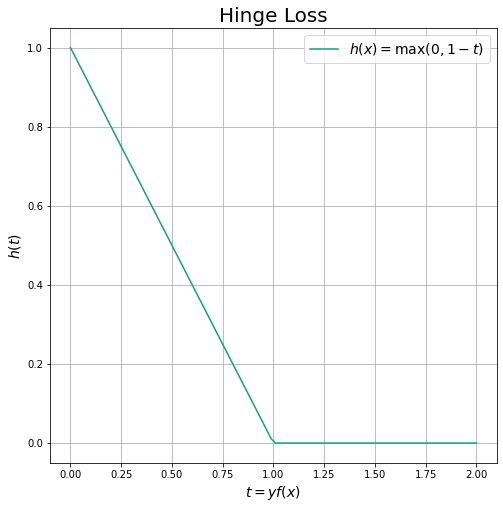

In [7]:
# Implement Hinge loss function from scratch
import numpy as np
import matplotlib.pyplot as plt
colors = [plt.cm.Dark2(i) for i in range(20)]



t = np.linspace(0,2,100)

def h(t):
    error = 1-t
    zeros = np.zeros_like(t)
    return np.max([zeros, error], axis = 0)


# plotting
plt.figure(figsize = (8,8))
plt.plot(t, h(t), color = colors[0], label = '$h(x) = \max(0,1-t)$')
plt.title('Hinge Loss', fontsize =20)
plt.xlabel('$t = yf(x)$', fontsize = 14)
plt.ylabel('$h(t)$', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()
plt.savefig('hinge_loss.png')

## 8. 커널 트릭



### 8.1 여전히 남은 문제... 비선형 분류.

